# ・ライブラリのインポート

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# ・データの読み込み

In [2]:
train = pd.read_csv('/Users/markun/SIGNATE/train.csv')
test = pd.read_csv('/Users/markun/SIGNATE/test.csv')

In [3]:
test

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,398,0,126,80,0,0,40.096264,0.822517,21
1,3833,3,88,60,20,0,39.810590,0.204331,22
2,4836,3,114,76,0,0,33.198760,0.521011,21
3,4572,1,146,74,0,0,26.890259,0.504950,38
4,636,1,123,90,26,140,40.270088,0.800513,28
...,...,...,...,...,...,...,...,...,...
1995,3138,4,150,60,0,0,39.385785,0.175051,26
1996,191,6,153,88,0,0,38.614204,0.509367,28
1997,3294,7,106,78,0,0,51.678147,0.728404,29
1998,3073,2,101,70,0,0,40.271989,0.316558,26


In [4]:
train

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,200,9,125,74,0,0,28.536910,0.444902,45,1
1,3832,4,109,80,0,0,28.047673,0.238243,22,0
2,4927,4,88,78,39,0,52.371341,0.279471,26,0
3,4088,9,125,74,0,0,40.062688,0.203922,45,0
4,3644,5,107,78,44,284,52.935068,0.284959,45,1
...,...,...,...,...,...,...,...,...,...,...
2995,4931,4,88,74,17,0,33.848723,0.171073,23,0
2996,3264,0,144,88,0,0,26.846832,0.259957,21,1
2997,1653,6,117,96,36,0,28.101646,0.716126,22,1
2998,2607,2,113,74,0,0,33.079021,0.266179,38,1


# ・目的変数を除外

In [5]:
train_x = train.drop(['Outcome'], axis = 1)
train_x 

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,200,9,125,74,0,0,28.536910,0.444902,45
1,3832,4,109,80,0,0,28.047673,0.238243,22
2,4927,4,88,78,39,0,52.371341,0.279471,26
3,4088,9,125,74,0,0,40.062688,0.203922,45
4,3644,5,107,78,44,284,52.935068,0.284959,45
...,...,...,...,...,...,...,...,...,...
2995,4931,4,88,74,17,0,33.848723,0.171073,23
2996,3264,0,144,88,0,0,26.846832,0.259957,21
2997,1653,6,117,96,36,0,28.101646,0.716126,22
2998,2607,2,113,74,0,0,33.079021,0.266179,38


# ・目的変数

In [6]:
train_y = train['Outcome']
train_y

0       1
1       0
2       0
3       0
4       1
       ..
2995    0
2996    1
2997    1
2998    1
2999    0
Name: Outcome, Length: 3000, dtype: int64

# ・訓練データを訓練用と検証用に分割する

In [17]:
X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y,
                                                        test_size=0.2,
                                                        shuffle=True,
                                                        random_state=42,
                                                        stratify=train_y)

# ・Logistic Regression

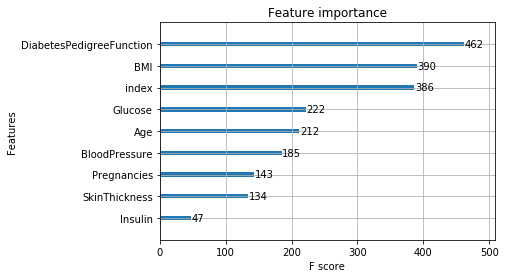

In [39]:
import matplotlib.pyplot as plt
xgb.plot_importance(bst)

#  ・テストデータに対する予測

In [40]:
prediction = bst.predict(xgb.DMatrix(test))
prediction = np.where(prediction < 0.5, 0,1)
prediction

array([1, 0, 0, ..., 0, 0, 1])

# ・提出用ファイルの作成

In [41]:
submission4 = pd.DataFrame({
    'index':test['index'],
    'Outcome':prediction, 
})
submission4.to_csv('/Users/markun/SIGNATE/submission4.csv', header = False, index = False )

In [42]:
submission4.head()

,index,Outcome
0,398,1
1,3833,0
2,4836,0
3,4572,0
4,636,0
